Project HRV fatigue.

In [1]:
import wfdb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.signal import detrend
import seaborn as sns
from scipy import fftpack

sns.set_style("dark")

In [2]:
def read(file):
    '''
    read a .hea file and convert it to a dataframe
    '''
    w = wfdb.rdsamp(file)
    return(pd.DataFrame(data=w[0], columns=w[1]['sig_name']))

/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:2535: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  coef, resids, rank, s = linalg.lstsq(A, newdata[sl])


Text(0.5,1,'No trend data')

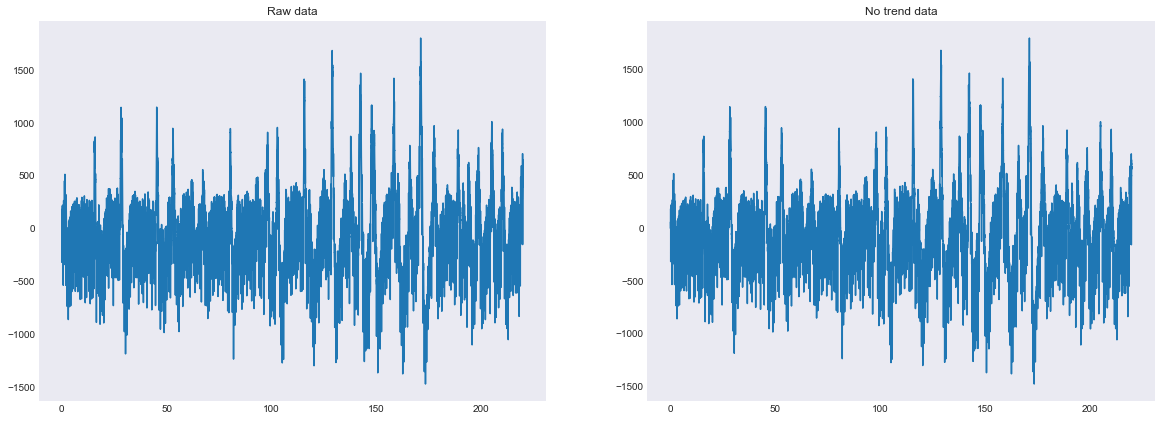

In [3]:
############
### data ###
############

w = wfdb.rdsamp('Data/s9_walk') # acces to a specific file from Physionet
freq = w[1]['fs'] # header acces to frequency sampling
df = pd.DataFrame(data=w[0], columns=w[1]['sig_name']) # convert the data into Pandas DataFrame
data = df.chest_ecg.values
t = np.linspace(0, np.shape(data)[0] / freq, np.shape(data)[0])
 
#######################
### removing trends ###
#######################

no_trend_data = detrend(data) # remove linear trend

############
### plot ###
############

plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
plt.plot(t, data)
plt.title("Raw data")
plt.subplot(1, 2, 2)
plt.plot(t, no_trend_data)
plt.title("No trend data")

(-4.605170185988091, 1.3862943611198906)

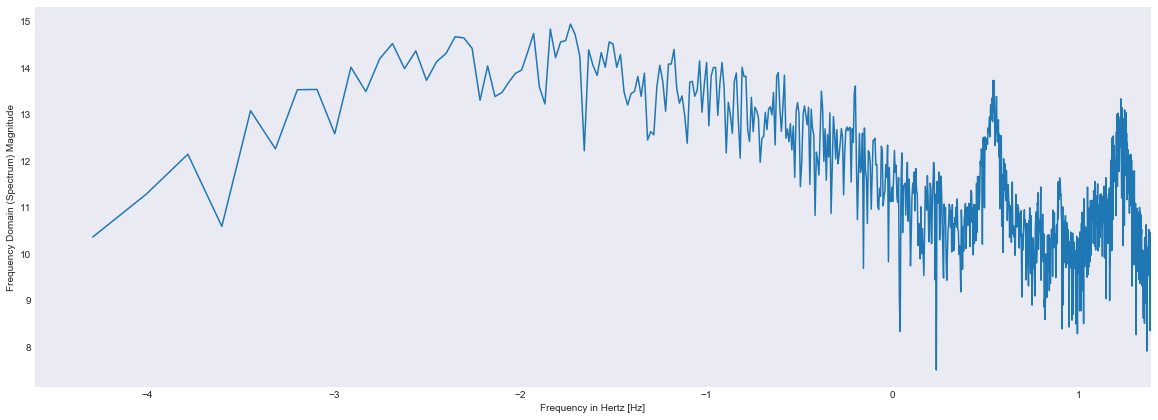

In [4]:
#########################
### fourier transform ###
#########################

windows_freq_min = 0.01 # in Hz
windows_freq_max = 4 # in Hz

f_s = 256
x = data
X = fftpack.fft(x)
freqs = fftpack.fftfreq(len(x)) * f_s
df_temp = pd.DataFrame(data={'freqs': freqs, 'abs(X)': np.abs(X)})
df_temp = df_temp[(windows_freq_min <= df_temp.freqs) & (df_temp.freqs <= windows_freq_max)]

fig, ax = plt.subplots(figsize=(20, 7))
ax.plot(np.log(df_temp.freqs), np.log(df_temp['abs(X)']))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(np.log(windows_freq_min), np.log(windows_freq_max))
#ax.set_ylim(-5, 110)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


Text(0,0.5,'Frequency Domain (Spectrum) Magnitude')

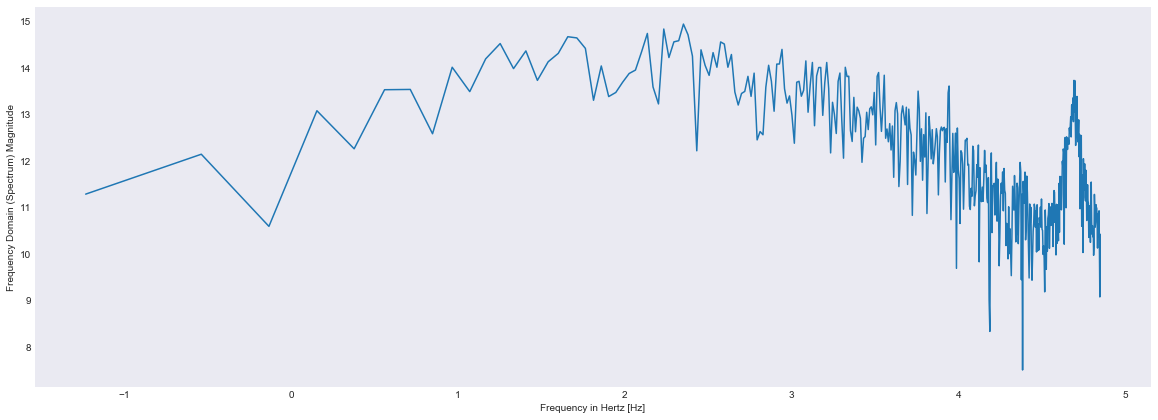

In [5]:
# inv Fourier
x = fftpack.ifft(df_temp['abs(X)'])
X = fftpack.fft(x)
freqs = fftpack.fftfreq(len(x)) * f_s
df_temp = pd.DataFrame(data={'freqs': freqs, 'abs(X)': np.abs(X)})
#df_temp = df_temp[(windows_freq_min <= df_temp.freqs) & (df_temp.freqs <= windows_freq_max)]

fig, ax = plt.subplots(figsize=(20, 7))
ax.plot(np.log(df_temp.freqs), np.log(df_temp['abs(X)']))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
#ax.set_xlim(np.log(windows_freq_min), np.log(windows_freq_max))

In [6]:
x = data
x = np.reshape(x, (1, len(x)))

In [7]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz


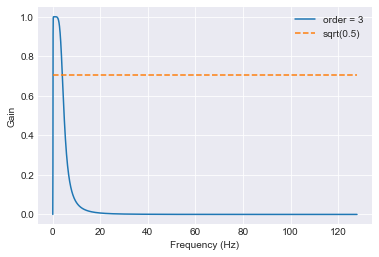

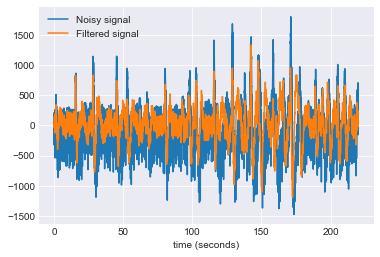

In [28]:
# Sample rate and desired cutoff frequencies (in Hz).
fs = 256
lowcut = 0.1
highcut = 4

# Plot the frequency response for a few different orders.
plt.figure(1)
plt.clf()
for order in [3]:
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    w, h = freqz(b, a, worN=2000)
    plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)

plt.plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)], '--', label='sqrt(0.5)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid(True)
plt.legend(loc='best')

# Filter a noisy signal.
x = data
t = np.linspace(0, np.shape(data)[0] / freq, np.shape(data)[0])
#x = np.reshape(x, (1, len(x)))
T = len(t) * freq
#t = np.reshape(t, (1, len(t)))

plt.figure(2)
plt.clf()
plt.plot(t, x, label='Noisy signal')

y = butter_bandpass_filter(x, lowcut, highcut, fs, order=3)
plt.plot(t, y, label='Filtered signal')
plt.xlabel('time (seconds)')
#plt.hlines([-a, a], 0, T, linestyles='--')
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')

plt.show()

(-4.605170185988091, 4.852030263919617)

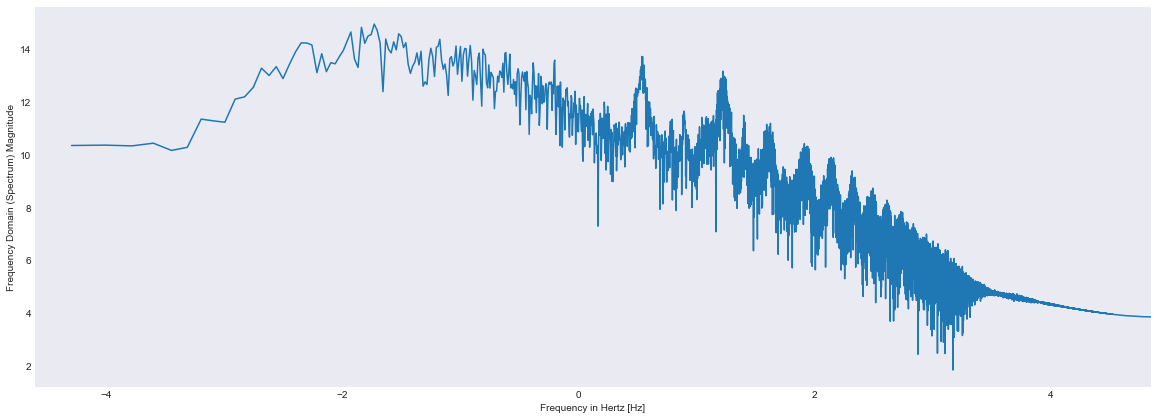

In [29]:
#########################
### fourier transform ###
#########################

windows_freq_min = 0.01 # in Hz
windows_freq_max = freq / 2 # in Hz

f_s = 256
x = y
X = fftpack.fft(x)
freqs = fftpack.fftfreq(len(x)) * f_s
df_temp = pd.DataFrame(data={'freqs': freqs, 'abs(X)': np.abs(X)})
df_temp = df_temp[(windows_freq_min <= df_temp.freqs) & (df_temp.freqs <= windows_freq_max)]

fig, ax = plt.subplots(figsize=(20, 7))
ax.plot(np.log(df_temp.freqs), np.log(df_temp['abs(X)']))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(np.log(windows_freq_min), np.log(windows_freq_max))
#ax.set_ylim(-5, 110)